slope -0.06474035447481574 y-intercept 1.960526777949019 MSE 1.068033539769327


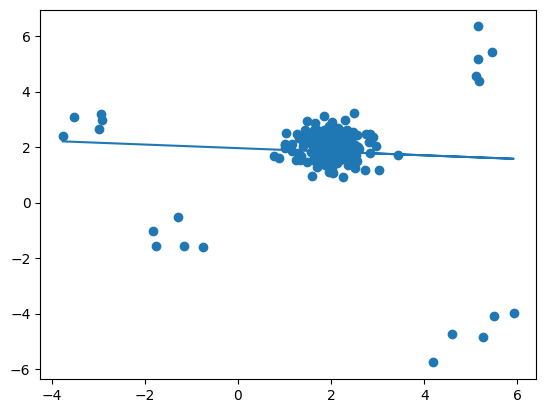

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

dataset = pd.read_excel('/content/Activity_1_Data (1) (1).xlsx')
x = dataset.iloc[:, 1].values
y = dataset.iloc[:, 2].values

error = 0.0001
a = 0.001/(np.std(x)*np.std(y))
m = len(x)

def ssd(w1,w0,z):
 sum = np.sum(((w1*x+w0-y))/(m)*z)
 return sum

def mse(w1,w0):
  sum=np.sum((w1*x+w0-y)**2)/(2*m)
  return sum

w1 = random.randint(0,100)
w0 = random.randint(0,100)
while (abs(ssd(w1,w0,x))>error) and (abs(ssd(w1,w0,1))>error):
 w0 = w0 - a*ssd(w1,w0,1)
 w1 = w1 - a*ssd(w1,w0,x)
print("slope",w1,"y-intercept",w0,"MSE",mse(w1,w0))

plt.scatter(x,y)
plt.plot(x,w1*x+w0)

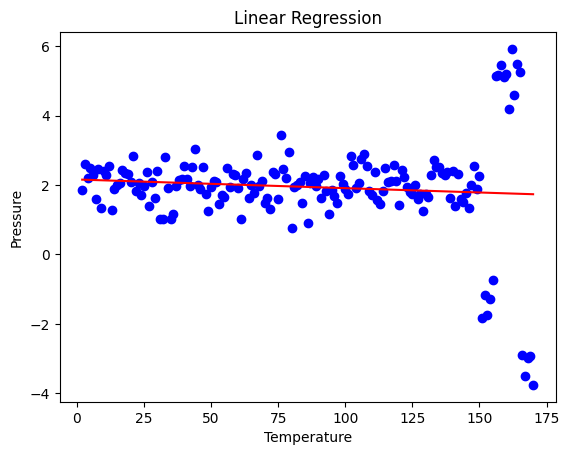

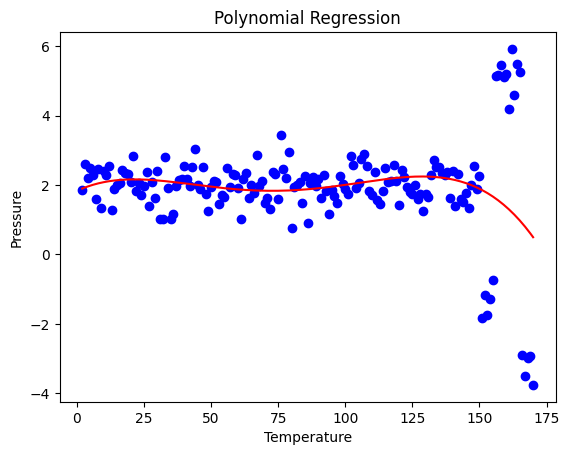

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

datas = pd.read_excel('/content/Activity_1_Data (1) (1).xlsx')
datas
X = datas.iloc[:, 0:1].values
y = datas.iloc[:, 1].values
# Features and the target variables

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(X, y)
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
# Visualising the Linear Regression results
plt.scatter(X, y, color='blue')

plt.plot(X, lin.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()
# Visualising the Polynomial Regression results
plt.scatter(X, y, color='blue')

plt.plot(X, lin2.predict(poly.fit_transform(X)),
		color='red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()


Enter no of centroids :4


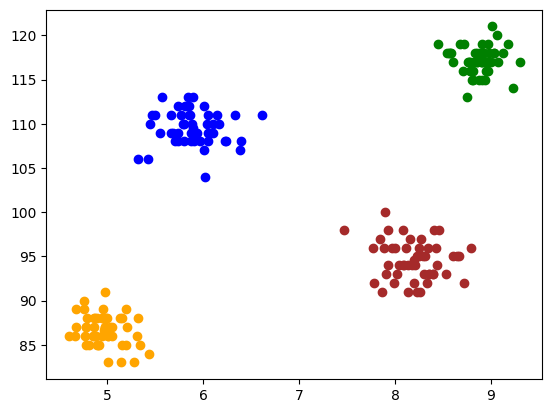

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import sys

df = pd.read_csv('/content/student_clustering.csv')
x = df['cgpa'].values
y = df['iq'].values

# x=np.random.randint(0,10000,1000)
# y=np.random.randint(0,10000,1000)

colour = ["Brown","Green","Blue","Orange","Yellow","Black","Red","Pink","Turquoise","Maroon"]
m = len(x)
k = int(input("Enter no of centroids :"))
centroid = np.zeros([2*k])
for i in range(0,k):
  centroid[2*i] = (np.random.randint(x.min(),x.max()))
  centroid[2*i+1] = np.random.randint(y.min(),y.max())

prev = centroid
while True:
  count = np.zeros([k])
  array = np.zeros([m,2*k])
  for j in range(0,m):
    least = sys.maxsize
    for l in range(0,k):
      if math.sqrt((centroid[2*l]-x[j])**2 + (centroid[2*l+1]-y[j])**2) < least :
        least = math.sqrt((centroid[2*l]-x[j])**2 + (centroid[2*l+1]-y[j])**2)
        min = [2*l,2*l+1]
    a = int(min[0]/2)
    b = min[1] - 1
    array[int(count[a])][b] = x[j]
    array[int(count[a])][b+1] = y[j]
    count[a] += 1
  centroid = np.sum(array,axis=0)
  for l in range(0,k):
    if count[l]==0:
      count[l] = 1
    centroid[2*l] /= count[l]
    centroid[2*l+1] /= count[l]
  if np.array_equal(centroid,prev):
    break
  prev = centroid
for i in range(0,k):
  plt.scatter(array[0:int(count[i]),2*i],array[0:int(count[i]),2*i+1],color=colour[i])
  plt.scatter(centroid[2*i],centroid[2*i+1],color=colour[i])

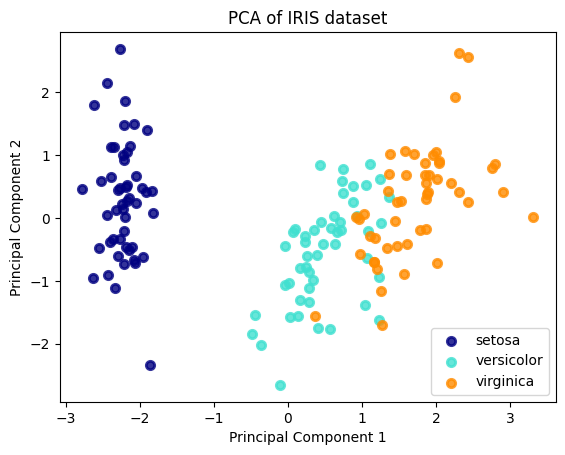

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset (or you can use your own dataset)
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

# Standardize the features (mean=0, std=1)
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_std = (X - mean) / std

# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create a scatter plot to visualize the PCA results
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


170498071/170498071 [==============================] - 2s 0us/step


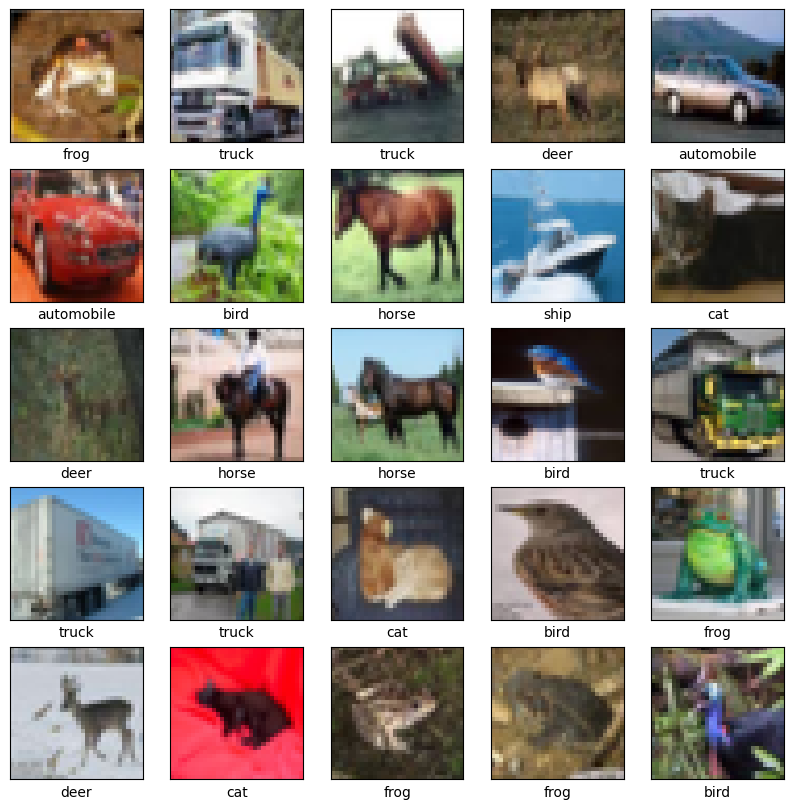

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

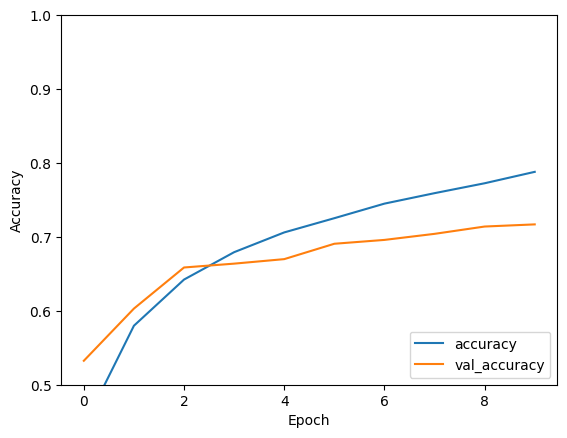

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


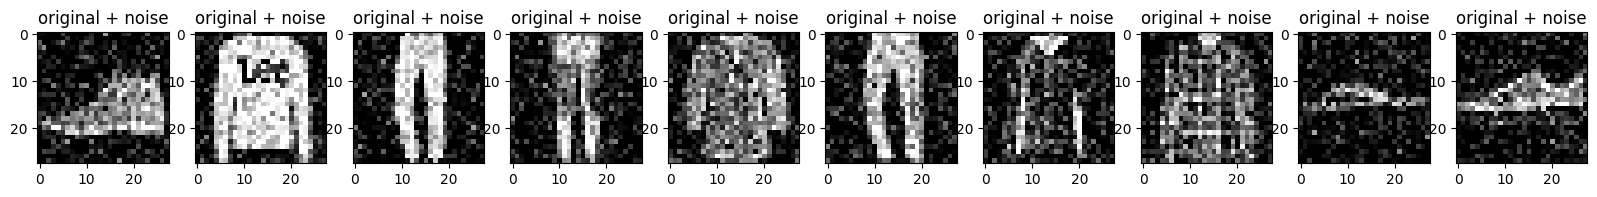

Epoch 1/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0164 - val_loss: 0.0096
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0088 - val_loss: 0.0084
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 4/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 6/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 7/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 8/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 9/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 10/10
1875/1875 [==============================] - 62s 33m

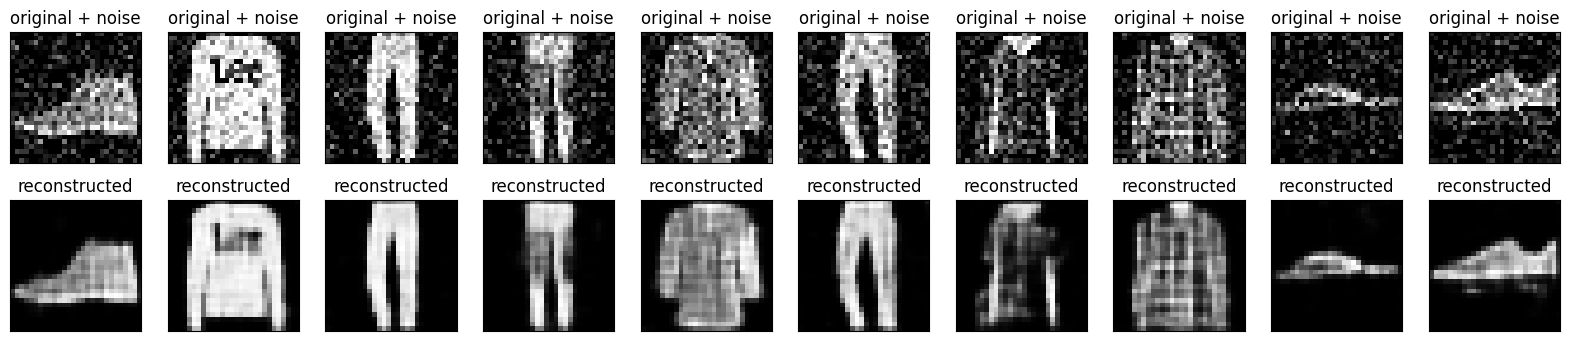

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))
autoencoder.encoder.summary()
autoencoder.decoder.summary()
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

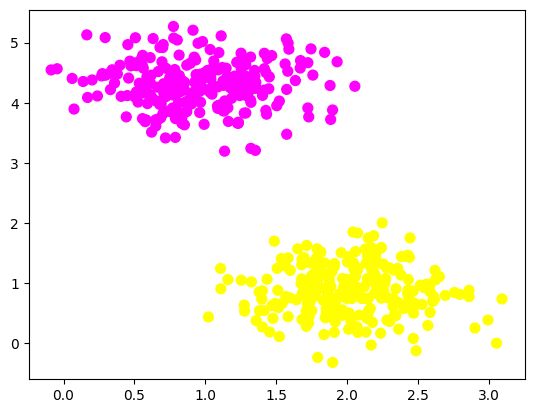

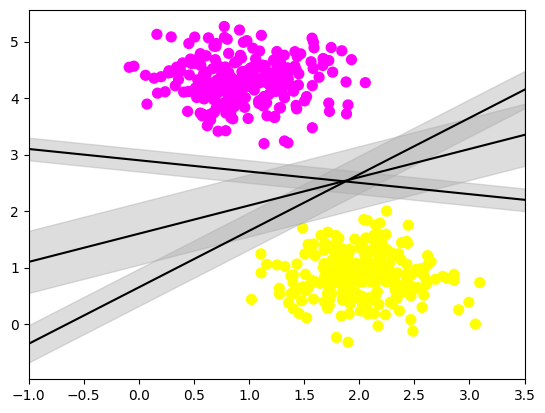

In [ ]:
import numpy as np
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs

# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=500, centers=2,
				random_state=0, cluster_std=0.40)
import matplotlib.pyplot as plt
# plotting scatters
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring');
plt.show()
# creating linspace between -1 to 3.5
xfit = np.linspace(-1, 3.5)

# plotting scatter
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')

# plot a line between the different sets of data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
	yfit = m * xfit + b
	plt.plot(xfit, yfit, '-k')
	plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
	color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);
plt.show()

Text(0, 0.5, 'feature2')

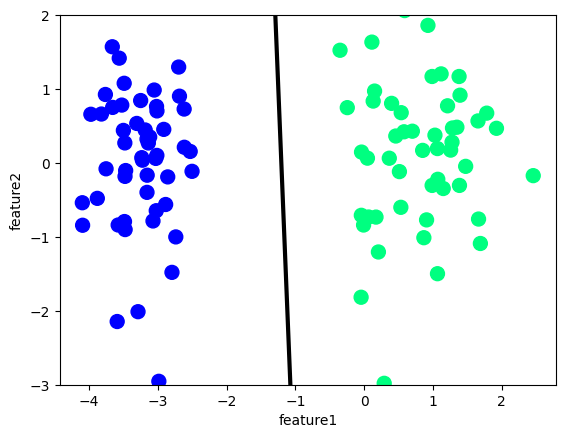

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Binary Logistic Regression dataset.csv')

X = df.drop('target',axis=1).to_numpy()
y = df['target'].to_numpy()
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
def gd(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

    return weights[1:],weights[0]


def sigmoid(z):
    return 1/(1 + np.exp(-z))
w_all,w_not = gd(X,y)
m = -(w_all[0]/w_all[1])
c = -(w_not/w_all[1])
x_input1 = np.linspace(-3,2,10) # necessary for the line as the line should be in y limits
y_input1 = m*x_input1 + c

plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.xlabel('feature1')
plt.ylabel('feature2')

<Axes: xlabel='PC1', ylabel='PC2'>

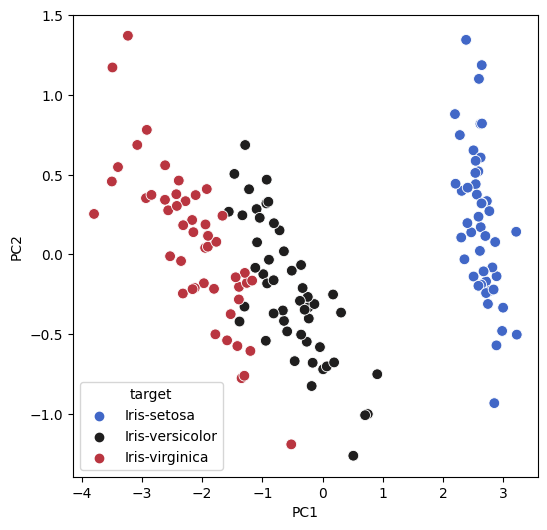

In [ ]:
import numpy as np

def PCA(X , num_components):

    #Step-1
    X_meaned = X - np.mean(X , axis = 0)

    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)

    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

    return X_reduced

import pandas as pd

#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#prepare the data
x = data.iloc[:,0:4]

#prepare the target
target = data.iloc[:,4]

#Applying it to PCA function
mat_reduced = PCA(x , 2)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


dataset = pd.read_csv('/content/BostonHousing.csv')

threshold = 0.001
a = 0.00001

x = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

x = np.insert(x,0,1,axis=1)
x = np.transpose(x)
m = x.shape[1]
w = np.random.randint(0,100,x.shape[0]).reshape(1,x.shape[0])
prev = w

def cost(w):
  y_pred = np.dot(w,x)
  J = np.sum((y_pred-y)**2/(2*m))
  return J

def diff(w,z):
  y_pred = np.dot(w,x)
  total = np.dot((y_pred-y),z)
  derivative = total/m
  return derivative

while True:
  prev = cost(w)
  for i in range(0,x.shape[0]):
    z = x[i,:]
    w[0,i] = w[0,i] - a*diff(w,z)

  error = cost(w) - prev
  if(abs(error) < threshold):
    break

print(w,cost(w))

x = np.transpose(x)
X_train,X_test ,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

reg = LinearRegression()
reg.fit(X_train,y_train)
print("Intercept/W_not of Lr is :",reg.intercept_)
print("Coeff/W_all of LR is :",reg.coef_[1:])



[[9 0 0 0 0 0 0 0 0 0 0 0 0 0]] 133.77820158102767
Intercept/W_not of Lr is : 37.19980774265013
Coeff/W_all of LR is : [-1.08223557e-01  3.89039349e-02 -1.51517627e-02  3.15897941e+00
 -1.65854070e+01  3.63288486e+00  9.35052187e-03 -1.38618151e+00
  3.24065945e-01 -1.16245167e-02 -1.03644251e+00  1.16127489e-02
 -5.58409340e-01]
